


<!-- 
1.  
    - Like Cov
    - Cov of conditional expressions.
    - That the expecatation of a conditiaton two variables is a function of the given variable.


2. Conditional distributions,  the conditional distribution of one variable given the other is also normally distributed for normal distributions. This is from our homework.  -->



3.  What is a covarient matrix, is that just the jocbian?

No !!!

A covariance matrix and a Jacobian matrix are different concepts:
Covariance Matrix:

Measures how variables vary together (their co-variation)
 - Is symmetric and square
 - Elements show correlation/relationship between variables
 - Used in statistics and probability
 - Formula: $Cov(X,Y) = E[(X- \mu _x)(Y- \mu _y)]$


| Var(X)   Cov(X,Y) |

| Cov(Y,X) Var(Y)   |


Jacobian Matrix:

 - Contains all first-order partial derivatives
 - Shows how a vector-valued function changes
 - Not necessarily symmetric
 - Used in calculus and optimization
 - Elements are ∂fi/∂xj

 

Below is not really 3 things I learnt, but 1 and half things I learnt.
I was exploring random walks.
Below was me just seeing a two 2d-representation of a random walk.


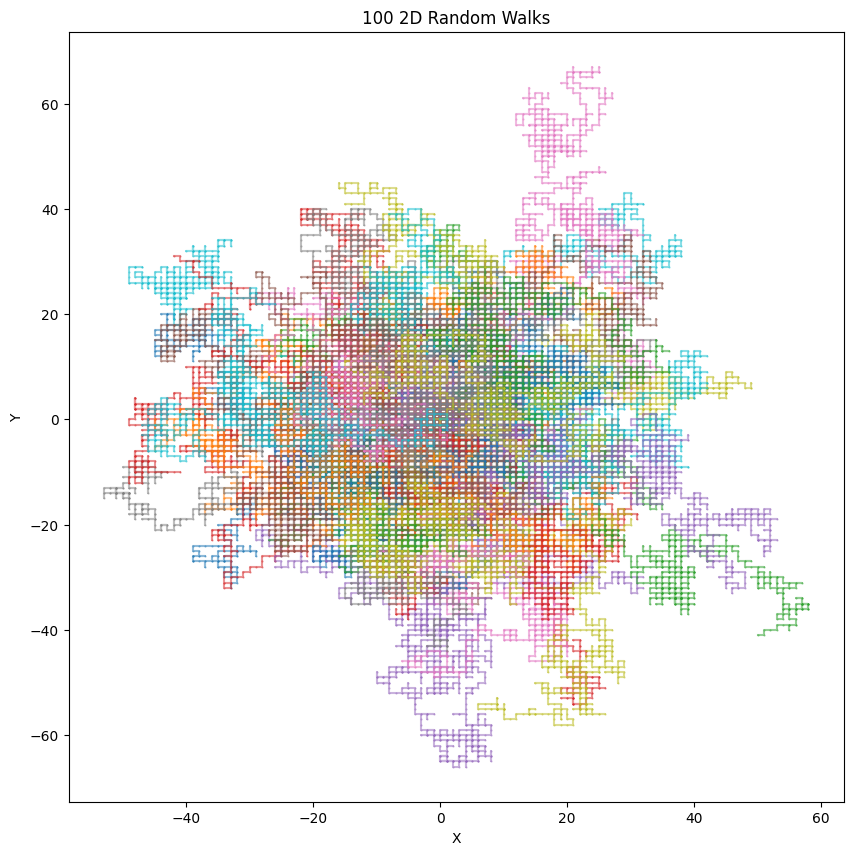

In [21]:
from random_walks import *
oneHundredRandomWalks()

##### What is spatial homogeneity?

Spatial homogeneity states that the statistical properties of the walk are the same at every point in space.

This means that the process is invariant under translations, which is math jargon for the behavior of the process looks the same no matter where you start or where you observe it. Meaning the probability of taking a step in any given direction is uniform across all locations.



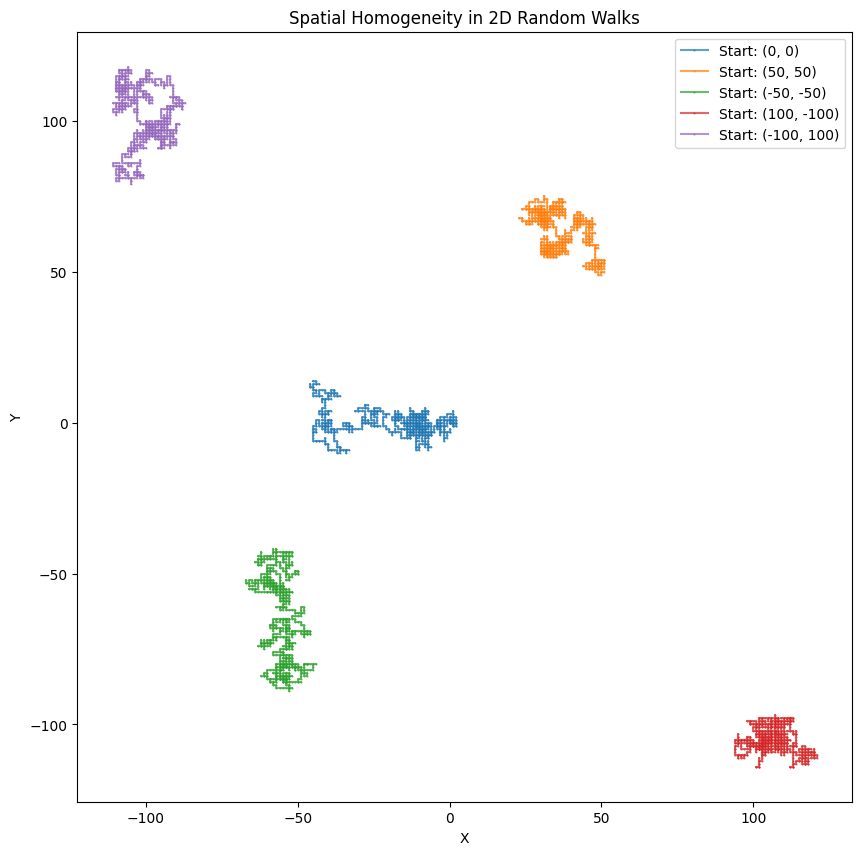

In [1]:
from random_walks import *
random_walk_spatial() 


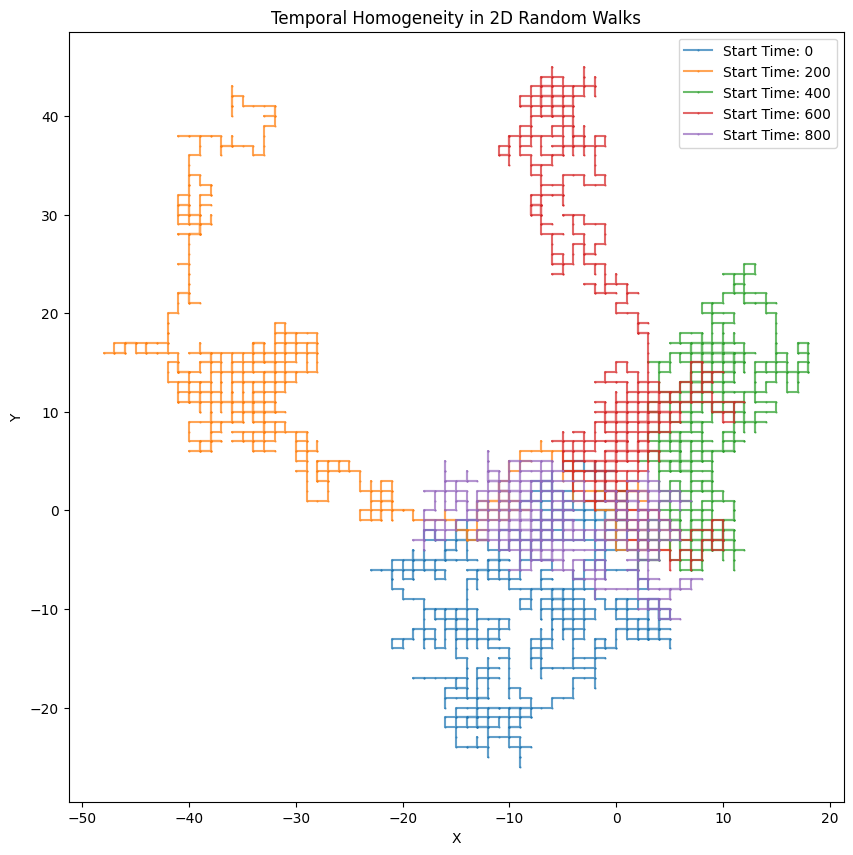

In [1]:
from random_walks import *
random_walk_temporal()



#### Why in a Random walk is the expected value 0? And the variance linear?

 - The expected value is easy to coneptually understand. If you have a uniform distrobution from -1, 1 then your midpoint there after summing everything up would be zero.

 - Variance, I do not have an entire intuitve feel for.


Oh so, if we say we have $n$ random variables, then take the variance of $X_n$ random variables!

This is a bit of review for us

$
\text{if } X_i \text{ is i.i.d random variable with } \E[X_i] = \mu \text{ and } \Var[X_i] = \sigma^2.
$

$\text{Then our  random walk will be } S_n = \sum_{i=1}^n X_i.
$

$
\text{We want to find the variance of } S_n:
$

$
\Var[S_n] = \Var\left[\sum_{i=1}^n X_i\right]
$

$
\text{Since the } X_i \text{'s are independent, the variance of the sum is the sum of the variances is:} 
\Var[S_n] = \sum_{i=1}^n \Var[X_i]
$


$
\Var[S_n] = \sum_{i=1}^n \sigma^2
$
$
\text{Since there are } n \text{ terms in the sum:}
$
$
\Var[S_n] = n\sigma^2
$

This is how the variance scales linearly

Expected Value: 0.386
Variance: 964.7670039999999


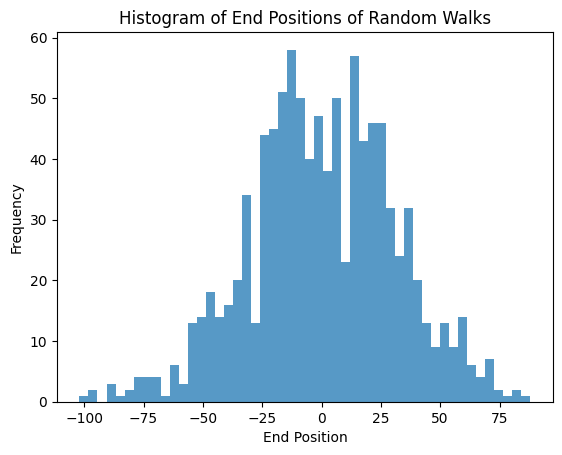

In [1]:
from random_walks import *
random_walks_var_expected_val()

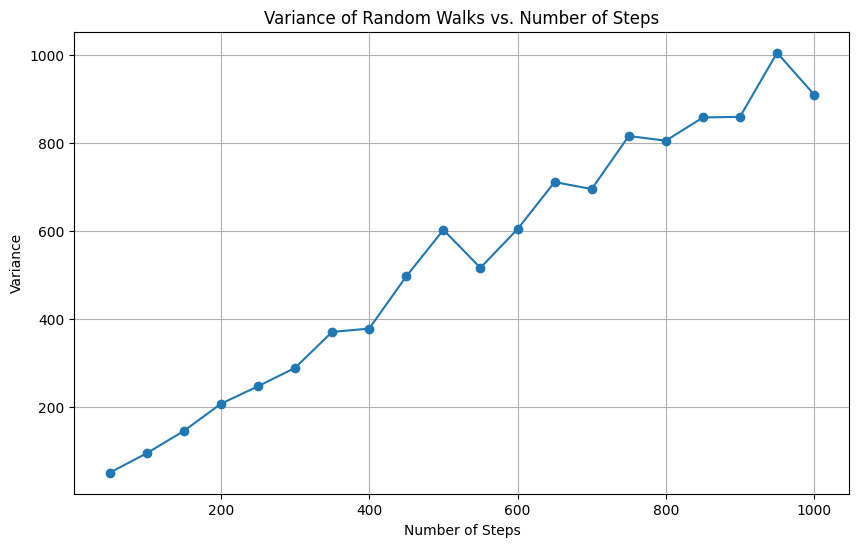

In [2]:

variance_is_Linear()

4. The law of total variance, I still don't entirely see that.


#### Nothing to see here, playing with bivariate contours

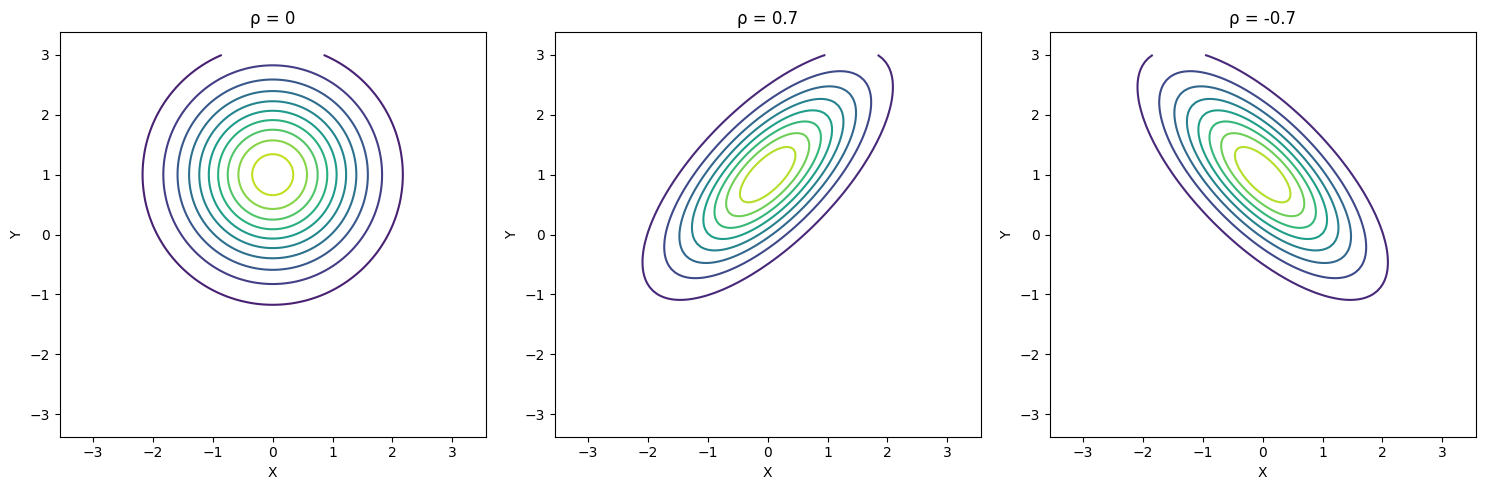

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Create a grid of points
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)

# Create the position vector
pos = np.dstack((X, Y))

# Create figures for different correlations
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Parameters for different correlations
correlations = [0, 0.7, -0.7]
titles = ['ρ = 0', 'ρ = 0.7', 'ρ = -0.7']

for ax, correlation, title in zip([ax1, ax2, ax3], correlations, titles):
    # Define the parameters
    mean = [0, 1]
    cov = [[1, correlation], 
           [correlation, 1]]
    
    # Create the multivariate normal distribution
    rv = multivariate_normal(mean, cov)
    
    # Calculate the probability density function
    Z = rv.pdf(pos)
    
    # Plot the contours
    ax.contour(X, Y, Z, levels=10)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.axis('equal')

plt.tight_layout()
plt.show()

I am sorta looking into what we will be expirencing in class, but also trying to get an understanding of concepts I have seen before.

I do know covriance matrices are used in PCA. 
I forgot how and why?

Google said:
    PCA involves calculating the eigenvectors and eigenvalues of the covariance matrix. 
    The eigenvectors represent the principal components, which are the directions of maximum variance in the data.  
    The eigenvalues represent the amount of variance explained by each principal component.
    By selecting the eigenvectors with the largest eigenvalues, you can reduce the dimensionality of the data while retaining the most important information.



Covariance Matrix:
[[ 1.   0.7  0.3 -0.2]
 [ 0.7  1.2  0.1 -0.4]
 [ 0.3  0.1  0.8  0.5]
 [-0.2 -0.4  0.5  1.1]]


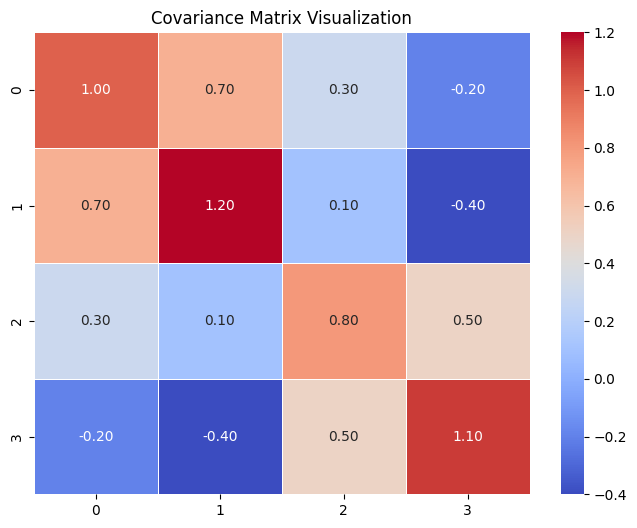


Explained Variance Ratio: [0.46835466 0.37089993]


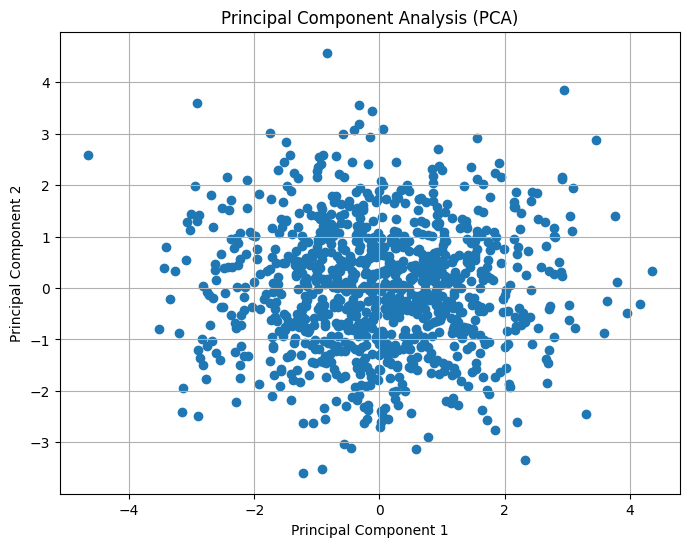


Principal Components:
[[ 0.58099381  0.68167035  0.00130972 -0.4447134 ]
 [ 0.32842113  0.14520103  0.66623552  0.65359503]]

PCA mean:
[-0.01098602 -0.02500236  0.00706815  0.0473479 ]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

# Generate correlated random data (4 variables)
np.random.seed(42)  # For reproducibility

# Create a covariance matrix to define the relationships
covariance_matrix = np.array([
    [1.0, 0.7, 0.3, -0.2],
    [0.7, 1.2, 0.1, -0.4],
    [0.3, 0.1, 0.8, 0.5],
    [-0.2, -0.4, 0.5, 1.1]
])

# Generate random data based on the covariance matrix
mean = [0, 0, 0, 0]  # Mean of the variables
data = np.random.multivariate_normal(mean, covariance_matrix, size=1000)

# Display the covariance matrix
print("Covariance Matrix:")
print(covariance_matrix)

#Visualize the covariance matrix with seaborn
plt.figure(figsize=(8,6))
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Covariance Matrix Visualization")
plt.show()

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components
principal_components = pca.fit_transform(data)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("\nExplained Variance Ratio:", explained_variance)

# Visualize the principal components
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Principal Component Analysis (PCA)")
plt.grid(True)
plt.show()

#Show the components themselves
print("\nPrincipal Components:")
print(pca.components_)

#Show the mean that was used by PCA.
print("\nPCA mean:")
print(pca.mean_)

#### PLEASE IGNORE EVERYTHING AFTER THIS

My game is

1. You roll a fair di.
2. Then you flip a coin 4 times. Each head, will be summed up then square your value of your die roll.
3. Your total win is $X^Y$ where $X$ is the di you rolled and $Y$ is the number of heads you flipped.



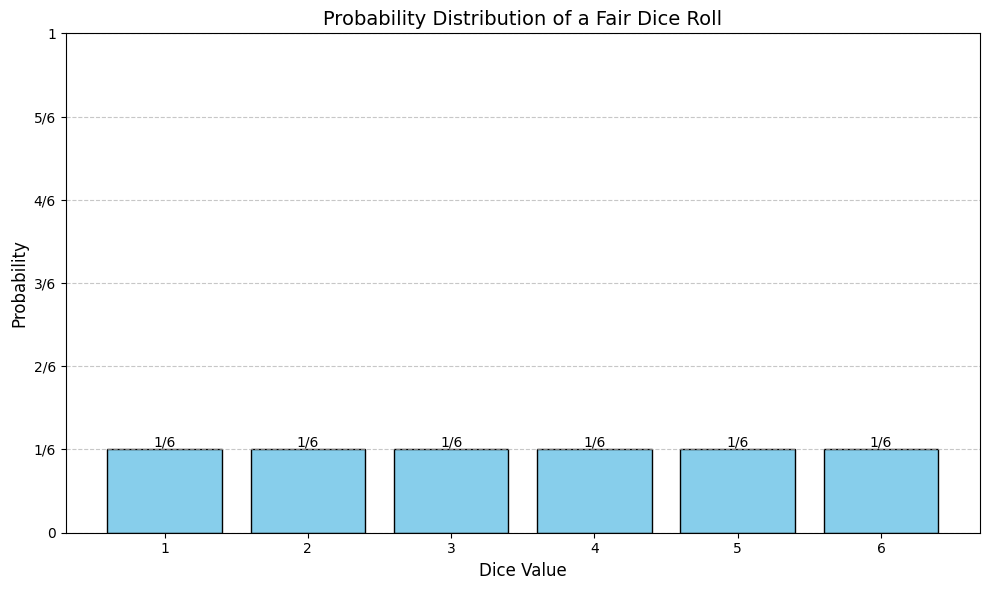

In [1]:
import matplotlib.pyplot as plt

# Define the dice values and their probabilities
dice_values = [1, 2, 3, 4, 5, 6]
probabilities = [1/6] * 6  # Each value has 1/6 probability

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(dice_values, probabilities, color='skyblue', edgecolor='black')

# Customize the plot
plt.title('Probability Distribution of a Fair Dice Roll', fontsize=14)
plt.xlabel('Dice Value', fontsize=12)
plt.ylabel('Probability', fontsize=12)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set y-axis to show probabilities as fractions
plt.yticks([0, 1/6, 2/6, 3/6, 4/6, 5/6, 1], 
           ['0', '1/6', '2/6', '3/6', '4/6', '5/6', '1'])

# Add value labels on top of each bar
for i in range(len(dice_values)):
    plt.text(dice_values[i], probabilities[i], f'1/6', 
             ha='center', va='bottom')

# Set x-axis ticks to show only integer values
plt.xticks(dice_values)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [12]:
import itertools
from collections import Counter
import pandas as pd

def toss_four_coins():
    # Generate all possible combinations for 4 tosses of a fair coin
    possible_outcomes = list(itertools.product(['H', 'T'], repeat=4))
    
    # Convert 'H' to 1 and 'T' to 0
    numeric_outcomes = []
    for outcome in possible_outcomes:
        numeric_outcomes.append([1 if toss == 'H' else 0 for toss in outcome])
    
    # Count occurrences of total heads (i.e., sum of 1s in each outcome)
    results = []
    for outcome in numeric_outcomes:
        total_heads = sum(outcome)
        results.append(total_heads)
    
    # Calculate probabilities
    total_outcomes = len(numeric_outcomes)
    probability_dict = Counter(results)
    for key in probability_dict:
        probability_dict[key] = probability_dict[key] / total_outcomes
    
    # Create a list of dictionaries for each row
    data = []
    for heads in sorted(probability_dict.keys()):
        occurrences = probability_dict[heads] * total_outcomes
        probability = probability_dict[heads]
        data.append({
            'Total Heads': heads,
            'Number of Occurrences': int(occurrences),
            'Probability': f"{probability:.4f}"
        })
    
    # Create DataFrame from the list of dictionaries
    df = pd.DataFrame(data)
    
    return df

# Display the table
table = toss_four_coins()
print("\nProbability Distribution for 4 Tosses of a Fair Coin:")
print("=" * 60)
print(table.to_string(index=False))



Probability Distribution for 4 Tosses of a Fair Coin:
 Total Heads  Number of Occurrences Probability
           0                      1      0.0625
           1                      4      0.2500
           2                      6      0.3750
           3                      4      0.2500
           4                      1      0.0625
